<h1 style="text-align:center; font-family:courier; font-size:300%">News Classification (LSTM)</h1>

In [1]:
import pandas as pd
import numpy as np

import string

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abinesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Dense, Embedding, Input, LSTM, Dropout, GlobalMaxPool1D
from tensorflow.keras import Model

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
vocab_size    = 1000
embedding_dim = 16
max_length    = 120
trunc_type    = 'post'
padding_type  = 'post'
oov_tok       = ""
training_portion = .8

In [6]:
## category is present
df_train = pd.read_csv('data-sets/BBC News Train.csv')
df_train.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [7]:
## category is not present -> We need to find
df_test  = pd.read_csv('data-sets/BBC News Test.csv')
df_test.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


## Split between Dependent and Independent variables

In [8]:
x = df_train['Text']
y = df_train['Category']

In [9]:
print(x)

0       worldcom ex-boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens in ...
3       lifestyle  governs mobile choice  faster  bett...
4       enron bosses in $168m payout eighteen former e...
                              ...                        
1485    double eviction from big brother model caprice...
1486    dj double act revamp chart show dj duo jk and ...
1487    weak dollar hits reuters revenues at media gro...
1488    apple ipod family expands market apple has exp...
1489    santy worm makes unwelcome visit thousands of ...
Name: Text, Length: 1490, dtype: object


In [10]:
print(y)

0            business
1            business
2            business
3                tech
4            business
            ...      
1485    entertainment
1486    entertainment
1487         business
1488             tech
1489             tech
Name: Category, Length: 1490, dtype: object


## Y-Variable (Category feature) --> Tokenisation + Vectorizer

In [11]:
lbl = LabelBinarizer()
y = lbl.fit_transform(y) ## category -> label encoding -> vector 

In [12]:
print(y)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [13]:
print(y)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]]


## Split between Train and Test Data

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## X-Variable (Category feature) --> Tokenisation + Vectorizer

In [15]:
max_features = 1000
tokenizer    = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(x))

In [16]:
### tokenisation + vectorization
tokenized_list_train = tokenizer.texts_to_sequences(x_train)
for i in range(4):
    print(tokenized_list_train[i])
    print("\n")

[135, 8, 327, 890, 81, 352, 7, 327, 890, 517, 493, 18, 143, 85, 81, 21, 1, 49, 48, 7, 683, 313, 8, 22, 1, 49, 168, 7, 1, 3, 1, 143, 85, 270, 171, 375, 89, 77, 329, 21, 49, 81, 313, 6, 1, 374, 43, 2, 492, 7, 143, 100, 19, 689, 307, 14, 689, 307, 4, 14, 754, 21, 416, 7, 313, 6, 81, 125, 262, 91, 137, 689, 137, 81, 794, 4, 137, 6, 661, 14, 852, 137, 47, 4, 208, 417, 14, 85, 47, 794, 223, 589, 729, 23, 4, 4, 969, 44, 852, 85, 184, 794, 4, 184, 8, 1, 48, 7, 683, 313, 44, 22, 5, 138, 101, 348, 845, 4, 44, 22, 155, 298, 816, 517, 493, 211, 352, 31, 2, 6, 588, 31, 81, 14, 3, 323, 890, 4, 1, 49, 630, 3, 588, 4, 14, 32, 890, 6, 1, 124, 292, 393, 340, 34, 175, 9, 136, 57, 3, 28, 225, 56, 297, 56, 56, 90, 1, 21, 1, 998, 6, 13, 11, 14, 32, 10, 1, 41, 200, 313, 998, 36, 678, 5, 42, 85, 81, 98, 70, 81, 3, 1, 211, 18, 28, 2, 292, 8, 32, 671, 8, 31, 689, 2, 206, 274, 34, 9, 1, 612, 109, 50, 69, 87, 153, 8, 1, 13, 21, 1, 574, 2, 206, 1, 48, 20]


[43, 18, 43, 31, 17, 699, 22, 1, 688, 263, 521, 9, 3, 639

In [17]:
tokenized_list_test  = tokenizer.texts_to_sequences(x_test)
for i in range(4):
    print(tokenized_list_test[i])
    print("\n")

[103, 49, 139, 103, 42, 5, 271, 10, 9, 294, 2, 191, 5, 414, 6, 42, 20, 13, 1, 878, 581, 846, 3, 364, 10, 189, 28, 6, 17, 65, 234, 515, 10, 76, 44, 1, 70, 631, 49, 133, 22, 65, 41, 53, 5, 3, 42, 1, 7, 983, 25, 294, 2, 359, 667, 12, 2, 3, 4, 1, 66, 252, 25, 460, 3, 1, 49, 351, 250, 4, 1, 120, 190, 3, 57, 461, 360, 4, 6, 4, 70, 351, 1, 3, 6, 837, 244, 925, 52, 1, 690, 3, 1, 255, 4, 61, 1, 368, 3, 1, 282, 3, 1, 255, 7, 631, 443, 39, 73, 279, 1, 831, 42, 2, 116, 4, 6, 695, 34, 41, 13, 10, 1, 133, 37, 42, 2, 40, 489, 4, 158, 128, 1, 864, 3, 11, 37, 458, 12, 1, 296, 737, 451, 1, 7, 224, 13, 10, 7, 3, 4, 14, 4, 14, 28, 22]


[12, 317, 7, 9, 2, 1, 285, 3, 521, 449, 317, 97, 2, 5, 47, 17, 1, 269, 317, 18, 39, 6, 706, 61, 5, 47, 212, 4, 15, 13, 26, 37, 5, 27, 206, 78, 1, 188, 14, 12, 15, 681, 2, 441, 54, 97, 15, 73, 61, 1, 9, 28, 962, 2, 1, 269, 9, 109, 1, 681, 2, 176, 1, 3, 78, 2, 206, 7, 405, 212, 6, 1, 715, 4, 15, 18, 39, 936, 5, 47, 212, 22, 1, 269, 1, 870, 227, 9, 2, 16, 2, 730, 21, 270, 381

## Padding

In [18]:
maxlen = 100
x_train = pad_sequences(tokenized_list_train, maxlen = maxlen)
for i in range(4):
    print(x_train[i])
    print("\n")

[352  31   2   6 588  31  81  14   3 323 890   4   1  49 630   3 588   4
  14  32 890   6   1 124 292 393 340  34 175   9 136  57   3  28 225  56
 297  56  56  90   1  21   1 998   6  13  11  14  32  10   1  41 200 313
 998  36 678   5  42  85  81  98  70  81   3   1 211  18  28   2 292   8
  32 671   8  31 689   2 206 274  34   9   1 612 109  50  69  87 153   8
   1  13  21   1 574   2 206   1  48  20]


[846   3   4  14 101   4  22   1 639 828 883  12 579  10   7  35   1   5
  58  20 308   5 971 475  24  15 741 634  44   1 631   9 454   1 344  14
  28 365   6   1 225  15 118  29  25   1   3  57  67  29 239  69 277 132
   2  11   9  86 688 263  29 239  69  98 152   2  70  33   2   1 216   3
  57  67  14 634   7  43 391  65 363   6  11  18   4  71  29  25 316  19
   3  24   2  11 397  11   9  57  76  56]


[630   5   3  31 375   2  31 200 956  35  79 461   1  48   6   1 845 255
 178  15   7 507   5 689  24  64  11 662  67   2  88   5 689  15  18   2
 156   2  50   3 151  13  15  90 561

In [19]:
x_test  = pad_sequences(tokenized_list_test,  maxlen = maxlen)
for i in range(4):
    print(x_test[i])
    print("\n")

[  2   3   4   1  66 252  25 460   3   1  49 351 250   4   1 120 190   3
  57 461 360   4   6   4  70 351   1   3   6 837 244 925  52   1 690   3
   1 255   4  61   1 368   3   1 282   3   1 255   7 631 443  39  73 279
   1 831  42   2 116   4   6 695  34  41  13  10   1 133  37  42   2  40
 489   4 158 128   1 864   3  11  37 458  12   1 296 737 451   1   7 224
  13  10   7   3   4  14   4  14  28  22]


[ 14  12  15 681   2 441  54  97  15  73  61   1   9  28 962   2   1 269
   9 109   1 681   2 176   1   3  78   2 206   7 405 212   6   1 715   4
  15  18  39 936   5  47 212  22   1 269   1 870 227   9   2  16   2 730
  21 270 381   6  31 175  27  24  15 681  10 317  23  45  16 223 573 109
  61   5  47  91   4   5 190  41   2  20 317 681  31 521   4 490   2  45
  16 308  35  23  82   2 391   1 715   3]


[  9  13 307   5 697   8  61  83  14   5 665   3  26 164  77   2  20  31
   5 420   3  11 118 771   7 621 307   6   1 184 794  97   1   3   5 895
   1   2 319  38   2 771  11   9 341

## Model Creation

In [20]:
embed_size = 128    
def create_model():
    input = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size)(input)
    x = LSTM(64, return_sequences=True)(x)
    x = GlobalMaxPool1D()(x)

    x = Dense(50, activation="relu")(x)
    x = Dropout(0.3)(x)
    x = Dense(5, activation="softmax")(x)    

    return Model(inputs=input, outputs=x)

In [21]:
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 128)          128000    
                                                                 
 lstm (LSTM)                 (None, 100, 64)           49408     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                             

## Fitting the Data into the model

In [23]:
hist = model.fit(x_test, y_train, batch_size=32, epochs=12, validation_split=0.1)
hist

Epoch 1/12
9/9 [==============================] - 2s 93ms/step - loss: 1.6088 - accuracy: 0.2015 - val_loss: 1.6100 - val_accuracy: 0.2333
Epoch 2/12
9/9 [==============================] - 0s 31ms/step - loss: 1.5954 - accuracy: 0.3284 - val_loss: 1.6126 - val_accuracy: 0.1667
Epoch 3/12
9/9 [==============================] - 0s 30ms/step - loss: 1.5860 - accuracy: 0.3769 - val_loss: 1.6132 - val_accuracy: 0.1667
Epoch 4/12
9/9 [==============================] - 0s 31ms/step - loss: 1.5736 - accuracy: 0.3396 - val_loss: 1.6167 - val_accuracy: 0.2000
Epoch 5/12
9/9 [==============================] - 0s 30ms/step - loss: 1.5664 - accuracy: 0.3470 - val_loss: 1.6190 - val_accuracy: 0.2333
Epoch 6/12
9/9 [==============================] - 0s 31ms/step - loss: 1.5425 - accuracy: 0.4664 - val_loss: 1.6227 - val_accuracy: 0.1667
Epoch 7/12
9/9 [==============================] - 0s 30ms/step - loss: 1.5127 - accuracy: 0.4515 - val_loss: 1.6140 - val_accuracy: 0.2000
Epoch 8/12
9/9 [===========

## Accuracy Comparison

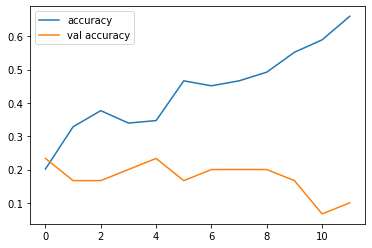

In [24]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

## Loss function comparison

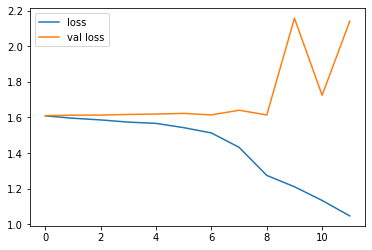

In [25]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()

## Predicting the model with the test data

In [26]:
y_pred = model.predict(x_test, batch_size=32, verbose=1)
print(y_pred.shape)

10/10 [==============================] - 0s 12ms/step
(298, 5)


In [27]:
df_probs_all = pd.DataFrame(y_pred, columns=['business', 'entertainment', 'politics', 'sport', 'tech'])
df_probs_all.head()

,business,entertainment,politics,sport,tech
0,0.112278,0.563073,0.129609,0.093734,0.101306
1,0.262064,0.286884,0.224246,0.081935,0.144870
2,0.006315,0.110508,0.004065,0.838584,0.040527
3,0.947978,0.018360,0.021687,0.000209,0.011766
4,0.037807,0.457525,0.028691,0.387221,0.088757


## Cateogry with all the probabilities

In [28]:
def top_5_predictions(df, N):
    cols = df.columns[:-1].tolist()
    a    = df[cols].to_numpy().argsort()[:, :-N-1:-1]
    c    = np.array(cols)[a]
    d    = df[cols].to_numpy()[np.arange(a.shape[0])[:, None], a]
    df1  = pd.DataFrame(c).rename(columns=lambda x : f'max_{x+1}_col')
    predicted_genres = df1["max_1_col"] + ' ' + df1["max_2_col"]+ ' ' +df1["max_3_col"]+ ' ' + df1["max_4_col"]
    return predicted_genres

In [29]:
pred_gen = top_5_predictions(df_probs_all, 5)
pred_gen

0      entertainment politics business sport
1      entertainment business politics sport
2      sport entertainment business politics
3      business politics entertainment sport
4      entertainment sport business politics
                       ...                  
293    entertainment sport business politics
294    sport entertainment business politics
295    business entertainment politics sport
296    business entertainment politics sport
297    business entertainment politics sport
Length: 298, dtype: object

In [30]:
final_results = pd.DataFrame(columns=['text', 'keywords'])

In [31]:
for index, txt in enumerate(x_test):
    final_results = final_results.append({'text': txt, 'keywords': pred_gen[index]}, ignore_index=True)

/var/folders/gq/nsqxf83n1813yysq2l8vvtxc0000gn/T/ipykernel_3632/3026006548.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_results = final_results.append({'text': txt, 'keywords': pred_gen[index]}, ignore_index=True)
/var/folders/gq/nsqxf83n1813yysq2l8vvtxc0000gn/T/ipykernel_3632/3026006548.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_results = final_results.append({'text': txt, 'keywords': pred_gen[index]}, ignore_index=True)
/var/folders/gq/nsqxf83n1813yysq2l8vvtxc0000gn/T/ipykernel_3632/3026006548.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_results = final_results.append({'text': txt, 'keywords': pred_gen[index]}, ignore_index=True)
/var/folders/gq/nsqxf83n1813yysq2l8vvtxc0000gn/T/ipy

In [32]:
final_results

,text,keywords
0,"[15, 13, 704, 435, 2, 16, 6, 1, 589, 473, 307,...",entertainment politics business sport
1,"[6, 1, 731, 18, 936, 32, 482, 359, 6, 1, 133, ...",entertainment business politics sport
2,"[3, 1, 41, 221, 14, 413, 3, 8, 100, 211, 4, 62...",sport entertainment business politics
3,"[150, 48, 46, 319, 8, 91, 83, 223, 573, 953, 5...",business politics entertainment sport
4,"[35, 11, 73, 1, 529, 137, 91, 3, 252, 1, 70, 6...",entertainment sport business politics
...,...,...
293,"[2, 16, 259, 4, 97, 10, 45, 18, 5, 619, 105, 3...",entertainment sport business politics
294,"[5, 6, 975, 7, 24, 15, 1, 6, 4, 53, 107, 7, 6,...",sport entertainment business politics
295,"[631, 14, 508, 27, 4, 5, 248, 857, 19, 15, 64,...",business entertainment politics sport
296,"[5, 6, 343, 33, 6, 1, 79, 26, 474, 585, 44, 12...",business entertainment politics sport


In [33]:
test_data = ["""
The US says China will face harsh "consequences" if it aids Russia in its invasion of Ukraine, according to US media reports.
Unnamed officials reportedly told multiple US news outlets that Russia asked China to provide military assistance after it began the invasion.
The Chinese embassy in Washington said it was not aware of this request.
The warning comes ahead of a meeting in Rome on Monday between top US and China officials.
Since the start of the crisis Beijing has expressed strong rhetorical support for long-time ally Moscow, but is not publicly known to have provided any military or economic support.
However local media outlets citing US officials, say that Russia has in recent days asked China specifically for military equipment, including drones. China's response to that request is not known.
In a CNN interview, US National Security Adviser Jake Sullivan said they were "communicating directly, privately to Beijing that there will absolutely be consequences for large-scale sanctions evasion efforts or support to Russia to backfill them.
"We will not allow that to go forward and allow there to be a lifeline to Russia from these economic sanctions from any country, anywhere in the world."
He added that while the US believed China was aware that Russian leader Vladimir Putin was "planning something" before the invasion happened, Beijing "may not have understood the full extent of it".
"Because it's very possible that [Mr] Putin lied to them the same way that he lied to Europeans and others," Mr Sullivan said.
Mr Sullivan is due to meet Yang Jiechi, a member of China's top decision-making body the Politburo and the head of the Central Foreign Affairs Commission, on Monday in Rome.
Reuters news agency quoted a US official as saying that during the meeting Mr Sullivan will spell out the consequences and isolation China would face if it increased support for Russia.
Liu Pengyu, a spokesman for China's embassy in Washington DC, told US media that he had not heard of Russia's request. He added: "The high priority now is to prevent the tense situation from escalating or even getting out of control."
China so far has refrained from condemning Russia for the invasion, and has said Moscow's "legitimate security concerns" should be taken seriously.
Chinese state media and government officials, besides echoing Russia's official line that it is a "special military operation" and not an invasion, have also been repeating Russian disinformation claims about the war in recent days.
But Beijing at the same time has expressed "unwavering support" for Ukraine's sovereignty. It has also called for peace, and has said it is ready to help end the war through diplomacy. Several countries have urged China to do more to stop Russia's invasion.
"""]

In [34]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(test_data)
tokenized_list_real = tokenizer.texts_to_sequences(test_data)

In [35]:
x_real = pad_sequences(tokenized_list_real, maxlen=maxlen)
real_preds = model.predict(x_real)

1/1 [==============================] - 0s 11ms/step


In [36]:
real_preds = pd.DataFrame(real_preds,columns=['business', 'entertainment', 'politics', 'sport', 'tech'])
real_preds

,business,entertainment,politics,sport,tech
0,0.150024,0.283391,0.123433,0.243319,0.199833
